In [1]:
from datetime import datetime

# Build a date using the datetime type

t=datetime(year=2021, month=10, day=28)
print(t)

2021-10-28 00:00:00


In [2]:
# Parse a date from a string
from dateutil import parser
date = parser.parse("28th of October, 2021")
print(date)

2021-10-28 00:00:00


In [3]:
# Print the day of the week
date. strftime('%A')

'Thursday'

In [4]:
# Create datetime64 using array()
import numpy as np

date = np.array('2021-10-28', dtype=np.datetime64)
print(date)
type(date)
# Use datetune64()
date = np.datetime64('2021-10-28' )
print(date)

2021-10-28
2021-10-28


In [5]:
# We can quickly do vectorized operations on datetime64
date_Arr=date + np.arange(12)
print(date_Arr)

['2021-10-28' '2021-10-29' '2021-10-30' '2021-10-31' '2021-11-01'
 '2021-11-02' '2021-11-03' '2021-11-04' '2021-11-05' '2021-11-06'
 '2021-11-07' '2021-11-08']


In [7]:
# Minite-based datetime
t= np.datetime64('2021-10-28 10:13')
print(t)
# Nanosecond-based datetime

t = np.datetime64('2021-10-27 09:27:10.20', 'ns')
print(t)

2021-10-28T10:13
2021-10-27T09:27:10.200000000


In [8]:
# Parse a string date in pandas
import pandas as pd

date = pd.to_datetime("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [9]:
# Output the day of the week

print(date.strftime('%A'))


# NumPy-style vectorized operations

date + pd.to_timedelta(np.arange(7))


"""
Pandas Time Seires: Indexing by Time
"""

# Indexing by timestamps

ind = pd.DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
                        '2021-10-31', '2021-11-01', '2021-11-02'])

print(ind)

ser = pd.Series([0, 1, 2, 3, 4, 5, 6], index=ind)
print(ser)


# Indexing patterns

print(ser['2021-10-27':'2021-10-31'], '\n')

print(ser['2021-11'])


"""
Pandas Time Series Data Structures
"""

# Timestamp and DatetimeIndex

dates = pd.to_datetime([datetime(2015, 7, 3),
                      "4th of July, 2015",
                      '2015-Jul-6',
                      '07-07-2015',
                      '20150708'])

print(dates)



# DatetimeIndex -> PeriodIndex with to_period()

dates.to_period('D')


# TimedeltaIndex

dates - dates[0]


"""
Regular Sequences
"""

# pd.date_range(). default freq: day

pd.date_range('2021-10-27', '2021-10-31')


# Use startpoint and num. of periods

pd.date_range('2021-10-27', periods=5)


# Change the frequency

pd.date_range('2021-10-27', periods=12, freq='H')


# pd.period_range()

pd.period_range('2021-10', periods=12, freq='M')


# pd.timedelta_range()

pd.timedelta_range(0, periods=10, freq='H')


Wednesday
DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02'],
              dtype='datetime64[ns]', freq=None)
2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
2021-11-01    5
2021-11-02    6
dtype: int64
2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
dtype: int64 

2021-11-01    5
2021-11-02    6
dtype: int64
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [10]:

"""frequencies and offsets"""
#frequency codes
pd.date_range('2021-11-01', periods=10, freq='M')

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
#빈도 코드에 접미사 's'추가: 종료시점->시작시점으로 변경
#pd.date_range('2021-11-01', periods=10, freq='MS')
pd.date_range('2021-11-01', periods=10, freq='QS')

DatetimeIndex(['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
               '2024-01-01', '2024-04-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [15]:
#빈도+ 숫자 결합
pd.date_range('2021-11-01', periods=9, freq='2H30T') #2시간 30분
pd.date_range('2021-11-01', periods=9, freq='100D') #100일마다

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [19]:
#오프셋을 이용한 타임스탬프 계산
from pandas.tseries.offsets import DateOffset
ts=pd.Timestamp('2021-10-31 23:28:30')
ts+DateOffset(hours=40)

Timestamp('2021-11-02 15:28:30')

In [22]:
#오프셋 마이너스
ts - DateOffset(years=71, month=4, days=5, hours=19, minutes=28, seconds=30)

Timestamp('1950-04-25 04:00:00')

In [28]:
#8-2
#구글 주가 데이터 불러오기
from pandas_datareader import data
goog=data.DataReader('GOOG', start = '2004', end='2021', data_source='yahoo')
goog=goog['Close']
#goog.head()
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Name: Close, Length: 4122, dtype: float64


<AxesSubplot:xlabel='Date'>

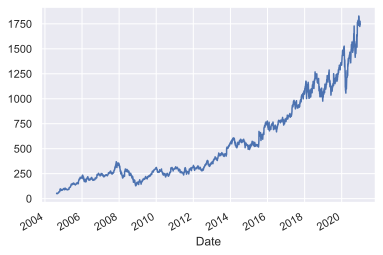

In [31]:
goog.plot()

In [30]:
#리샘플링: 시계열 빈도 변경에 따라 데이터 표본을 재추출하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format='svg' 

In [32]:
#리샘플링
goog.resample('Q').mean() #3달=90일(분기별)간의 데이터를 하나의 값으로 나타냄

Date
2004-09-30      55.211886
2004-12-31      85.182200
2005-03-31      94.299493
2005-06-30     120.979508
2005-09-30     147.513490
                 ...     
2019-12-31    1290.565161
2020-03-31    1356.975803
2020-06-30    1349.559919
2020-09-30    1525.829367
2020-12-31    1687.301720
Freq: Q-DEC, Name: Close, Length: 66, dtype: float64